# 2.1.1 MA 過程　～ Moving Average Process～

ホワイトノイズ(W.N.)を拡張したものであり、具体的にはホワイトノイズの線形和で表される。

【定義】１次MA過程とは、

$$ y_{t} = \mu + \epsilon_{t} + \theta_{1}\epsilon_{t-1} , \hspace{15pt} \epsilon_{t} \sim W.N.(\sigma^{2}) $$

で定義され、$y_{t}$がMA(1)に従うことは、$y_{t} \sim MA(1)$ と表現する。

$\mu$ および$\theta_{1}$は定数（パラメータ）である。

最も基礎的な弱定常過程である、$ y_{t} = \mu + \epsilon_{t}$ に、"$ + \theta_{1}\epsilon_{t-1}$" が追加されている。


ここで、$\epsilon_{t} \sim W.N.(\sigma^{2})$とは、$\epsilon_{t}$ が、以下の条件を満たす確率変数であることを表す。

---------

（復習）【教科書p.12 定義1.4】全ての時点tにおいて、

1. $ E(\epsilon_{t}) = 0 $ 　　（全ての時点tにおいて期待値がゼロ）
1. $ \gamma_{k} = E(\epsilon_{t}\epsilon_{t-k}) =  \sigma^{2}  $　　($k=0$ のとき。全てのtにおいて分散が一定)
1. $ \gamma_{k} = E(\epsilon_{t}\epsilon_{t-k}) = 0 $　　　 ($k \ne 0$ のとき。全てのtにおいて自己相関を持たない)

が成立するとき、$\epsilon_t$はホワイトノイズと呼ばれる

---------



$y_{t-1}$ についても、$y_{t}$ と同様に書くと、

$$ y_{t} = \mu + \epsilon_{t} + \theta_{1}\epsilon_{t-1} $$
$$ y_{t-1} = \mu + \epsilon_{t-1} + \theta_{1}\epsilon_{t-2} $$

とかける。どちらも$\epsilon_{t-1}$という共通項を持つので、２つのデータの間に相関が生じる。

### MA(1)過程の性質

* MA過程の確率的変動は全てホワイトノイズ$\epsilon_{t}$によって決まっている。
* まず、$\epsilon$の値が決まり、それに続いて$y$の値が順次決まっていく。
  

## 例2.1 MA(1)の具体例の計算

* $\epsilon$の値が決まり、それに続いて$y$の値が順次決まっていく。様子を確認する。
* python で計算してみました。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools

theta = 0.5
epsilon = np.array([0.5,-2.1,0.9,-0.2,-0.5,0.3,-0.4,0.8,2.2,-0.6,0.8]) # 11個
y = np.zeros(len(epsilon))

for t in range(1, len(epsilon)):
    y[t] = 1 + epsilon[t] + theta * epsilon[t-1] # epsilonによってyが決定する

y[1:]

array([-0.85,  0.85,  1.25,  0.4 ,  1.05,  0.75,  1.6 ,  3.6 ,  1.5 ,  1.5 ])

array([ 1.        , -0.26103967, -0.05453273,  0.18747077, -0.13713678,
        0.06142881, -0.00759608,  0.02558947, -0.035218  , -0.01009212,
        0.05472575])

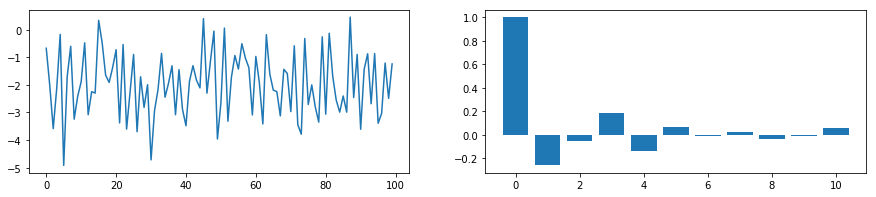

In [2]:
mu, theta = -2, -0.3 # parameter
sample = 101 # sample
np.random.seed(seed=123) #seed
mean , variance = 0,1 #normaldist-params
plt.figure(figsize=(15,3)) # graph size

plt.subplot(121)
epsilon = np.array(np.random.normal(mean, variance, sample)) # 正規ホワイトノイズ
y = np.zeros(len(epsilon))
for t in range(1, len(epsilon)):
    y[t] = mu + epsilon[t] + theta * epsilon[t-1]
plt.plot(y[1:]) #y[0]を飛ばす

plt.subplot(122)
acf = stattools.acf(y[1:],nlags=10)
plt.bar(range(len(acf)),acf)
acf

### MA(1) の期待値の計算

$y_{t} \sim MA(1)$ の期待値$E(y_{t})$を計算すると、

$$
\begin{eqnarray*}
E(y_t) &=& E(\mu + \epsilon_t + \theta_1 \epsilon_{t-1}) = E(\mu) + E(\epsilon_t) + \theta_1 E(\epsilon_{t-1}) \nonumber \\
&=& \mu + 0 + \theta_1 * 0 = \mu \nonumber
\end{eqnarray*}
$$


* $\mu$,$\theta_1$は定数なので、Eの外側に出せる。
* ホワイトノイズの定義、$E(\epsilon_t)=0, E(\epsilon_{t-1})=0$　より。

MA(1)に従う時系列データの期待値は、常にパラメータ$\mu$となる。グラフによる直観的な結果と当然一致する。



### MA(1) の分散

$y_{t} \sim MA(1)$ の期待値$V(y_{t})$を計算すると、分散の計算の定義から、

$$ Var(y_t) = E[(y_t - E(y_t))^2] $$

である。ところで、先ほどの結果から、$E(y_t) = \mu $　なので、

$$ 
= E[(\mu + \epsilon_t + \theta_1 \epsilon_{t-1}) - \mu )^2] = E[(\epsilon_t + \theta_1 \epsilon_{t-1} )^2]
= E[\epsilon_t^2 + 2 \theta_1 \epsilon_{t} \epsilon_{t-1} +  \theta_1^2 \epsilon_{t-1}^2 ] 
$$

期待値の計算をそれぞれの項に分解する（先ほど同様に定数は期待値計算の外に出しておく）と、



$$
= E[\epsilon_t^2] + 2 \theta_1 E[ \epsilon_{t}\epsilon_{t-1}] +  \theta_1^2 E[ \epsilon_{t-1}^2]
$$

となる。ここでホワイトノイズの定義、$E(\epsilon_t \epsilon_{t-1})=0, E(\epsilon_{t-1}^2)=\sigma^2$を使うと、

$$
= \sigma^2 + \theta_1^2 \sigma^2 = (1 + \theta_1^2 )\sigma^2
$$

となる。したがって、MA(1)過程の分散は$\theta_1^2\sigma^2$の分だけ、撹乱項の分散よりも大きくなる。


### MA(1) の自己共分散(k=1)
時点tと時点t-1の値の自己共分散 $\gamma_1$ を求める。$ y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1}$ ,および $E[y_t]=\mu$の結果を用いて変形すると、、、

$$
\gamma_1 = E[(y_t - E[y_t])(y_{t_1} - E[y_{t-1}])] = E[(\epsilon_t + \theta_1 \epsilon_{t-1})(\epsilon_{t-1} + \theta_1 \epsilon_{t-2})]
$$

期待値の中を展開し、定数部分を外に出す。

$$
= E[\epsilon_{t}\epsilon_{t-1}] + \theta_1 E[\epsilon_{t}\epsilon_{t-2}] + \theta_1 E[\epsilon^2_{t-1}] +  \theta_1 ^2 E[\epsilon_{t-1}\epsilon_{t-2}]
= 0 + 0 + \theta_1 \sigma^2 + 0 = \theta_1 \sigma^2 
$$


$\gamma_0 = Cov(y_t, y_t) = Var(y_t) = (1 + \theta_1^2 )\sigma^2 $ より、MA(1)過程の一次自己相関は、

$$
\rho_1 = \frac{\gamma_1}{\gamma_0} = \frac{\theta_1 \sigma^2}{(1 + \theta_1^2 )\sigma^2 } = \frac{\theta_1}{(1 + \theta_1^2 )}
$$

$\theta_1 \pm 1$ の時、一次自己相関関数の値は $ \pm 0.5 $。
一回の導関数がゼロになる $ \theta_1 $ を計算すれば、$ \pm 1 $ であることが示せる。【間に合わなかったら手書きで証明】


### 1次自己相関関数の形状を確認

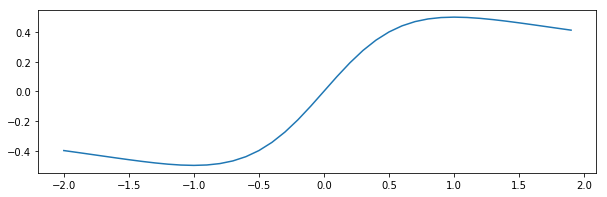

In [3]:
plt.figure(figsize=(10,3))
x = np.arange(-2,2,0.1)
rho = x / (1 + x**2)
plt.plot(x,rho)

### MA(1) の自己共分散(k=2)
２次以降の自己共分散 $ \gamma_{k >= 2} $ を調べるため、手始めに$k=2$を計算する。単純に定義に従って、、、

$$
\gamma_2 = E[(y_t - E[y_t])(y_{t_2} - E[y_{t-2}])] = E[(\epsilon_t + \theta_1 \epsilon_{t-1})(\epsilon_{t-2} + \theta_1 \epsilon_{t-3})]
$$

期待値の中を展開し、定数部分を外に出すと、

$$
= E[\epsilon_{t}\epsilon_{t-2}] + \theta_1 E[\epsilon_{t}\epsilon_{t-3}] + \theta_1 E[\epsilon_{t-1}\epsilon_{t-2}] +  \theta_1 ^2 E[\epsilon_{t-1}\epsilon_{t-3}]
$$

すると$\gamma_1$のときとは異なり、同じ$\epsilon_t$がかかって2乗になる項が存在しなくなる。ホワイトノイズの定義により、それらは全て0となるから、
$$
\gamma_2 = 0 
$$

である。

### MA(1) の自己共分散(k>2)

上記の結果より、$\gamma_3, \gamma_4, \dots$ の計算も同様にtが重なる項が存在しなくなるため、全て0。従ってMA(1)の自己共分散は

$$
\gamma_k =
\begin{cases}
(1 + \theta^2_1)\sigma^2 & (k=0)\\
\theta_1 \sigma^2 & (k=1) \\
0 & (k>1) 
\end{cases}
$$

### MA(1)の定常性

MA(1)過程に従う$y_t$の期待値と、自己共分散は、時刻tに依存しない（＝式中にtが含まれない）ので、MA(1)過程が定常であることがわかる。MA(1)過程はパラメータの値に関わらず常に定常となる。

------
【おさらい：弱定常性の定義(p.8)】

任意のtとkに対して、

* $E(y_t) = \mu $
* $Cov(y_t, y_{t-k}) = E[(y_t - \mu)(y_{t-k} - \mu)] = \gamma_k $

が成立する場合、過程は弱定常(weak stationary)といわれる。

------

### MA(q) 

ここまで1次の移動平均過程MA(1)の性質を見てきたので、次に一般形であるMA(q)の性質をみていくことにする。

【定義】q次MA過程とは、

$$ y_{t} = \mu + \epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + \dots + \theta_{q}\epsilon_{t-q} , \hspace{15pt} \epsilon_{t} \sim W.N.(\sigma^{2}) $$

で定義され、$y_{t}$がMA(q)に従うことは、$y_{t} \sim MA(q)$ と表現する。


### MA(q) の期待値

$$
\begin{eqnarray*}
E[y_{t}] &=& E[\mu + \epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + \dots + \theta_{q}\epsilon_{t-q} ]  \nonumber \\
&=&  \mu + E[\epsilon_{t}] + \theta_{1}E[\epsilon_{t-1}] + \theta_{2}E[\epsilon_{t-2}] + \dots + \theta_{q}E[\epsilon_{t-q}]  \nonumber \\
&=& \mu + 0 + 0 + \dots + 0 = \mu \nonumber
\end{eqnarray*}
$$


### MA(q) の分散

$$
\begin{eqnarray*}
Var[y_{t}] &=& E[(y_t - E[y_t])^2]  \nonumber \\
&=&  E[(\mu + \epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + \dots + \theta_{q}\epsilon_{t-q} - \mu)^2 ] \nonumber \\
&=& E[(\epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + \dots + \theta_{q}\epsilon_{t-q})^2 ] \nonumber \\
&=&  E[\epsilon_{t}^2 + \theta_{1}^2\epsilon_{t-1}^2 + \theta_{2}^2\epsilon_{t-2}^2 + \dots + \theta_{q}^2\epsilon_{t-q}^2 +2\sum\sum\theta_i \theta_j \epsilon_{t-i} \epsilon_{t-j} (i \ne j)] \nonumber 
\end{eqnarray*}
$$

ここで、最終項は、$i \ne j$ より、期待値をとっても全てゼロとなる。

$$
\begin{eqnarray*}
Var[y_{t}] &=& E[\epsilon_{t}^2] + \theta_{1}^2E[\epsilon_{t-1}^2] + \theta_{2}^2E[\epsilon_{t-2}^2] + \dots + \theta_{q}^2E[\epsilon_{t-q}^2] + 0 \nonumber \\
&=& (1 + \theta_1^2 + \theta_2^2 + \dots  + \theta_q^2)\sigma^2 \nonumber
\end{eqnarray*}
$$

### MA(q) の自己共分散

####  $\gamma_{k=1}$ (1期前との自己共分散）の場合

$E[y_t] = \mu $の結果を利用して、

$$
\gamma_1 = Cov[y_{t},y_{t-1}] = E[(\epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + \dots + \theta_{q}\epsilon_{t-q})
(\epsilon_{t-1} + \theta_{1}\epsilon_{t-2} + \theta_{2}\epsilon_{t-3} + \dots + \theta_{q}\epsilon_{t-q-1})]
$$

ここまで何度もやってきたとおり、$\epsilon_{i}\epsilon_{j} (i \ne j)$となる項は期待値を取るとゼロになるので、$(i = j)$ となる項だけ抜き出す。

$$
\begin{eqnarray*}
\gamma _1 &=& E[\theta_{1}\epsilon_{t-1}^2 + \theta_{2}\theta_{1}\epsilon_{t-2}^2 + \theta_{3}\theta_{2}\epsilon_{t-3}^2 + \dots + \theta_{q}\theta_{q-1}\epsilon_{t-q}^2] \nonumber \\
&=& \theta_{1}E[\epsilon_{t-1}^2] + \theta_{2}\theta_{1}E[\epsilon_{t-2}^2] + \theta_{3}\theta_{2}E[\epsilon_{t-3}^2] + \dots  + \theta_{q}\theta_{q-1}E[\epsilon_{t-q}^2]  \nonumber \\
&=&  (\theta_{1} + \theta_{2}\theta_{1} + \theta_{3}\theta_{2} + \dots + \theta_{q}\theta_{q-1})\sigma^2 \nonumber
\end{eqnarray*}
$$



### MA(q) の自己共分散(つづき)

####  $\gamma_{k=2}$ (2期前との自己共分散, k<q）の場合

$E[y_t] = \mu $の結果を利用して、

$$
\gamma_2 =  Cov[y_{t},y_{t-2}] = E[(\epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + \dots + \theta_{q}\epsilon_{t-q})
(\epsilon_{t-2} + \theta_{1}\epsilon_{t-3} + \theta_{2}\epsilon_{t-4} + \dots + \theta_{q}\epsilon_{t-q-2})]
$$

さきほど同様に、$\epsilon_{i}\epsilon_{j} (i \ne j)$となる項は期待値を取るとゼロになるので、$(i = j)$ となる項だけ抜き出す。

$$
\begin{eqnarray*}
\gamma_2 &=& E[\theta_{2}\epsilon_{t-2}^2 + \theta_{3}\theta_{1}\epsilon_{t-3}^2 + \theta_{4}\theta_{2}\epsilon_{t-4}^2 + \dots + \theta_{q}\theta_{q-2}\epsilon_{t-q}^2] \nonumber \\
&=&  (\theta_{2} + \theta_{3}\theta_{1} + \theta_{4}\theta_{2}  + \dots +  \theta_{q}\theta_{q-2})\sigma^2 \nonumber \\
\end{eqnarray*}
$$


### MA(q) の自己共分散(つづき)

####  $\gamma_{k=j}$ (2期前との自己共分散, j<q）の場合
$k=1,2$の結果から、$k=j(j<q)$のとき、

$$
\gamma_{j<q}= (\theta_{j} + \theta_{j+1}\theta_{1} + \theta_{j+2}\theta_{2}  + \dots +  \theta_{q}\theta_{q-j})\sigma^2 \\
$$

####  $\gamma_{k=j}$ (2期前との自己共分散, j>q）の場合

MA(1)のとき、k=2以降は全てゼロだったことより、MA(q)においても、q次よりも過去のデータとの自己共分散は、$\epsilon_{t}$ が一致する項が存在しなくなることより、

$$\gamma_{j>q} = 0$$


### MA(q) の自己共分散(つづき)

#### まとめ
以上の結果より、MA(q)の自己共分散$\gamma_k$は、

$$
\gamma_k =
\begin{cases}
(1 + \theta^2_1 + \theta^2_2 + \dots + + \theta^2_q )\sigma^2 & \mbox{(k=0)分散} \\
(\theta_{j} + \theta_{j+1}\theta_{1} + \theta_{j+2}\theta_{2}  + \dots +  \theta_{q}\theta_{q-j})\sigma^2 & (1 \leq k \leq q) \\
0 & (k \geq q + 1)
\end{cases}
$$


### MA(q) の自己相関係数

$$
\begin{eqnarray*}
\gamma_{(1 \leq k \leq q)} &=&  (\theta_{k} + \theta_{k+1}\theta_{1} + \theta_{k+2}\theta_{2}  + \dots  + \theta_{q}\theta_{q-k})\sigma^2 \nonumber \\
\gamma_0 &=& (1 + \theta^2_1 + \theta^2_2 + \dots + + \theta^2_q )\sigma^2 \nonumber
\end{eqnarray*}
$$
より、
$$
\rho_k = \frac{\gamma_{k}}{\gamma_{0}} = 
\begin{cases}
\frac{ (\theta_{k} + \theta_{k+1}\theta_{1} + \theta_{k+2}\theta_{2} + \dots + \theta_{q}\theta_{q-k})\sigma^2 }
{(1 + \theta^2_1 + \theta^2_2 + \dots + + \theta^2_q )\sigma^2} & (1 \leq k \leq q) \\
0 & (k \geq q + 1)
\end{cases}
$$


### MA(q)の定常性

MA(q)過程に従う$y_t$の期待値と、自己共分散は、時刻tに依存しない（＝式中にtが含まれない）ので、MA(q)過程もまた定常であることがわかる。

### 定理2.1 MA(q)過程の性質（p.24）

ここまでの説明で証明が完了した。


### MA過程の問題点

* MA(q)過程のq+1次以降の自己相関はゼロ。言い換えればq次の自己相関をモデル化するためにはq個のパラメータを必要とする。
  * 長期にわたる自己相関をモデル化するためには、多くのパラメータが必要となる。
* MA(q)はホワイトノイズの線形和で表現されるため、モデルの解釈が難しい。ランダム項が何を表しているのか？


⇒AR過程を導入する。